In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_rating = pd.read_pickle('players_rating_clean.zip')
df_players = pd.read_csv('titled_players.csv', index_col=0)

In [3]:
df_rating

,id,date,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
0,4611870,2021-09-01,2290.0,0.0,NaN,NaN,NaN,NaN
1,4611870,2021-08-01,2290.0,0.0,NaN,NaN,NaN,NaN
2,4611870,2021-07-01,2290.0,0.0,NaN,NaN,NaN,NaN
3,4611870,2021-06-01,2290.0,0.0,NaN,NaN,NaN,NaN
4,4611870,2021-05-01,2290.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2835824,13730150,2017-10-01,NaN,NaN,NaN,NaN,1296.0,0.0
2835825,13730150,2017-09-01,NaN,NaN,NaN,NaN,1296.0,0.0
2835826,13730150,2017-08-01,NaN,NaN,NaN,NaN,1296.0,1.0
2835827,13730150,2017-07-01,NaN,NaN,NaN,NaN,1312.0,0.0


In [4]:
df_rating.groupby('id').max().head()

,date,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
id,,,,,,,
100013,2021-09-01,2557.0,41.0,2470.0,17.0,2448.0,13.0
100021,2021-09-01,2503.0,22.0,NaN,NaN,NaN,NaN
100072,2021-09-01,2518.0,36.0,2422.0,9.0,2419.0,9.0
100080,2021-09-01,2425.0,0.0,NaN,NaN,NaN,NaN
100102,2021-09-01,2340.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df_rating.groupby('id').mean().head()

,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
id,,,,,,
100013,2465.524096,7.957831,2421.7,1.466667,2390.621622,0.297297
100021,2435.174699,0.277108,NaN,NaN,NaN,NaN
100072,2456.843373,4.493976,2420.5,4.500000,2398.000000,4.500000
100080,2425.000000,0.000000,NaN,NaN,NaN,NaN
100102,2340.000000,0.000000,NaN,NaN,NaN,NaN


In [6]:
df_merged = df_players.merge(df_rating.groupby('id').mean(), how='left', on='id')

In [7]:
df_merged.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM),classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"['Candidate Master (CM)', '2012']",NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921.0,F,0,"['Woman Grandmaster (WGM)', '1978', 'Woman Int...",NaN,NaN,NaN,NaN,1950.0,NaN,1978.0,NaN,2290.000000,0.000000,NaN,NaN,NaN,NaN
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275.000000,0.000000,NaN,NaN,NaN,NaN
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2162.843373,1.445783,NaN,NaN,NaN,NaN
4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922.0,M,0,"['Grandmaster (GM)', '1952', 'International Ma...",NaN,NaN,NaN,NaN,NaN,1951.0,NaN,1952.0,2445.000000,0.000000,NaN,NaN,NaN,NaN


Toutes les variations d'elos lorsqu'il y a des parties jouées

In [8]:
test = df_rating.dropna(subset=['classique_parties'])[df_rating.dropna(subset=['classique_parties'])['classique_parties'] != 0]

In [9]:
df_players.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"['Candidate Master (CM)', '2012']",NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921.0,F,0,"['Woman Grandmaster (WGM)', '1978', 'Woman Int...",NaN,NaN,NaN,NaN,1950.0,NaN,1978.0,NaN
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922.0,M,0,"['Grandmaster (GM)', '1952', 'International Ma...",NaN,NaN,NaN,NaN,NaN,1951.0,NaN,1952.0


In [10]:
test2 = test.merge(df_players[['id','titre','pays','naissance','sexe','actif']], how='left', on='id')

Voyons voir comment les saisons/mois de l'année influence sur les statistiques

In [11]:
test2.groupby('date').mean()[['classique_elo','classique_parties','rapide_elo','rapide_parties' ,'blitz_elo' ,'blitz_parties']]

,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
date,,,,,,
2000-01-01,2310.712878,18.378079,NaN,NaN,NaN,NaN
2000-07-01,2313.164940,17.677889,NaN,NaN,NaN,NaN
2000-10-01,2323.400381,11.862627,NaN,NaN,NaN,NaN
2001-01-01,2312.196743,15.505207,NaN,NaN,NaN,NaN
2001-04-01,2313.767399,11.234457,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-01,2249.850467,8.042835,2178.459933,1.242070,2176.132992,2.040068
2021-06-01,2281.495286,7.240754,2221.390661,0.956420,2213.766929,0.829134
2021-07-01,2246.908115,7.176014,2186.437281,1.390329,2171.507338,2.178197


In [12]:
test2.groupby(['date','actif', 'titre']).mean()

id  classique_elo  classique_parties  \
date       actif titre                                                   
2000-01-01 0     CM     3.843323e+06    2175.597222          12.472222   
                 FM     4.095086e+06    2275.393717          12.640838   
                 GM     5.630504e+06    2474.962687          27.339552   
                 IM     5.154214e+06    2355.990640          19.365055   
                 WCM    8.068581e+06    2096.333333           5.333333   
...                              ...            ...                ...   
2021-09-01 1     IM     7.246601e+06    2356.773050           9.340426   
                 WCM    1.424942e+07    1746.040816           9.244898   
                 WFM    1.079172e+07    2036.323699          10.167630   
                 WGM    8.933658e+06    2257.631579           9.649123   
                 WIM    7.707029e+06    2127.831776           9.738318   

                         rapide_elo  rapide_parties    blitz_elo  \
date       actif titre                                             
2000-01-01 0     CM             NaN             NaN          NaN   
                 FM             NaN             NaN          NaN   
                 GM             NaN             NaN          NaN   
                 IM             NaN             NaN          NaN   
                 WCM            NaN             NaN          NaN   
...                             ...             ...          ...   
2021-09-01 1     IM     2309.481481        2.011272  2304.441640   
                 WCM    1619.480000        2.866667  1600.556962   
                 WFM    1920.051613        2.400000  1920.283871   
                 WGM    2187.442308        0.961538  2179.127273   
                 WIM    2045.677083        0.989583  2038.806452   

                        blitz_parties    naissance  
date       actif titre                              
2000-01-01 0     CM               NaN  1966.958333  
                 FM               NaN  1965.327749  
                 GM               NaN  1968.388060  
                 IM               NaN  1966.984375  
                 WCM              NaN  1972.666667  
...                               ...          ...  
2021-09-01 1     IM          3.048896  1981.659574  
                 WCM         4.582278  2002.989796  
                 WFM         3.251613  1994.826590  
                 WGM         2.127273  1985.543860  
                 WIM         1.838710  1989.308411  

[2467 rows x 8 columns]

In [13]:
test2.groupby(['date','actif', 'titre'],as_index=False).mean()

,date,actif,titre,id,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties,naissance
0,2000-01-01,0,CM,3.843323e+06,2175.597222,12.472222,NaN,NaN,NaN,NaN,1966.958333
1,2000-01-01,0,FM,4.095086e+06,2275.393717,12.640838,NaN,NaN,NaN,NaN,1965.327749
2,2000-01-01,0,GM,5.630504e+06,2474.962687,27.339552,NaN,NaN,NaN,NaN,1968.388060
3,2000-01-01,0,IM,5.154214e+06,2355.990640,19.365055,NaN,NaN,NaN,NaN,1966.984375
4,2000-01-01,0,WCM,8.068581e+06,2096.333333,5.333333,NaN,NaN,NaN,NaN,1972.666667
...,...,...,...,...,...,...,...,...,...,...,...
2462,2021-09-01,1,IM,7.246601e+06,2356.773050,9.340426,2309.481481,2.011272,2304.441640,3.048896,1981.659574
2463,2021-09-01,1,WCM,1.424942e+07,1746.040816,9.244898,1619.480000,2.866667,1600.556962,4.582278,2002.989796
2464,2021-09-01,1,WFM,1.079172e+07,2036.323699,10.167630,1920.051613,2.400000,1920.283871,3.251613,1994.826590
2465,2021-09-01,1,WGM,8.933658e+06,2257.631579,9.649123,2187.442308,0.961538,2179.127273,2.127273,1985.543860


In [14]:
test2.groupby(['date','titre']).mean()[['classique_elo', 'classique_parties']][:100]

classique_elo  classique_parties
date       titre                                  
2000-01-01 CM       2173.431694          10.333333
           FM       2263.688532          12.652387
           GM       2458.186888          29.562622
           IM       2344.881477          20.802859
           WCM      2069.555556           6.555556
...                         ...                ...
2003-04-01 CM       2162.694268           8.719745
           FM       2255.148560           9.786649
           GM       2456.903926          15.917355
           IM       2342.567093          12.992013
           WCM      2008.500000           4.700000

[100 rows x 2 columns]

In [15]:
test2.groupby(['date']).agg({'classique_elo':'mean','classique_parties':'mean'})

,classique_elo,classique_parties
date,,
2000-01-01,2310.712878,18.378079
2000-07-01,2313.164940,17.677889
2000-10-01,2323.400381,11.862627
2001-01-01,2312.196743,15.505207
2001-04-01,2313.767399,11.234457
...,...,...
2021-05-01,2249.850467,8.042835
2021-06-01,2281.495286,7.240754
2021-07-01,2246.908115,7.176014


In [16]:
test2.groupby(['date','actif', 'titre'],as_index=False).mean()[['date','actif', 'classique_elo', 'classique_parties']]

,date,actif,classique_elo,classique_parties
0,2000-01-01,0,2175.597222,12.472222
1,2000-01-01,0,2275.393717,12.640838
2,2000-01-01,0,2474.962687,27.339552
3,2000-01-01,0,2355.990640,19.365055
4,2000-01-01,0,2096.333333,5.333333
...,...,...,...,...
2462,2021-09-01,1,2356.773050,9.340426
2463,2021-09-01,1,1746.040816,9.244898
2464,2021-09-01,1,2036.323699,10.167630
2465,2021-09-01,1,2257.631579,9.649123


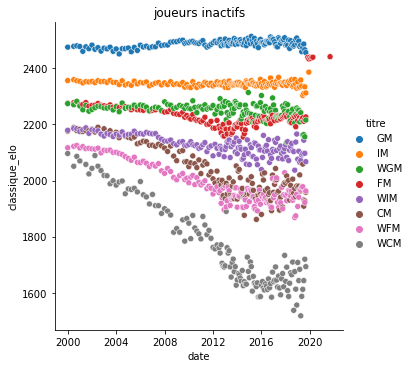

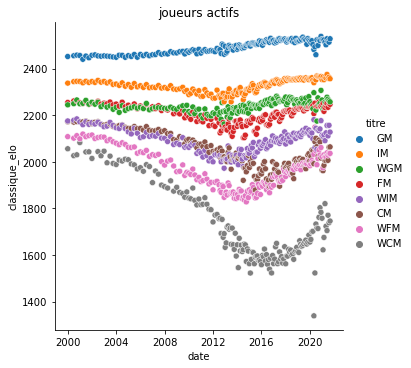

In [17]:
hue_order = ['GM', 'IM', 'WGM', 'FM', 'WIM', 'CM', 'WFM', 'WCM']
test3 = test2.groupby(['date','actif', 'titre'],as_index=False).mean()[['date','titre','actif','classique_elo','classique_parties']]
sns.relplot(data=test3[test3['actif']==0], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order)
plt.title('joueurs inactifs')
sns.relplot(data=test3[test3['actif']==1], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order)
plt.title('joueurs actifs')
plt.show()


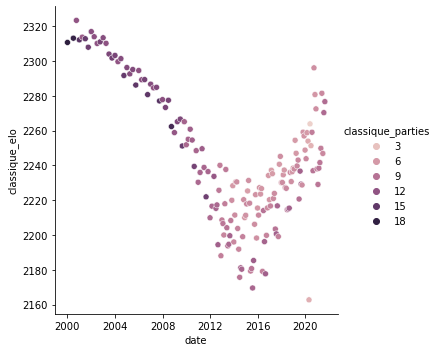

In [18]:
sns.relplot(data=test2.groupby('date').mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="classique_parties")
plt.show()

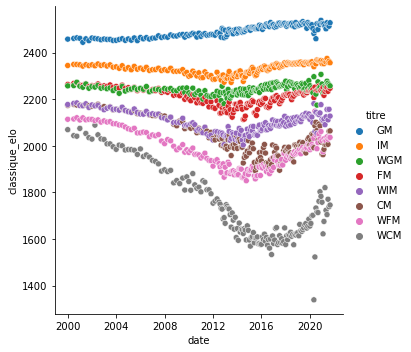

In [19]:
# sns.relplot(data = test.groupby('date').mean()[['classique_elo', 'classique_parties']], kind="line",
#             x='date',
#             y = 'classique_elo', 
#             hue='classique_parties')
# sns.relplot(data = test.groupby('date').mean()[['classique_elo', 'classique_parties']], kind="line",
#             x='date',
#             y = 'classique_elo')
# sns.relplot(data=test2.groupby('date').mean()[['classique_elo', 'classique_parties']], 
#            x='date', 
#            y="classique_elo",  
#            hue="classique_parties")
hue_order = ['GM', 'IM', 'WGM', 'FM', 'WIM', 'CM', 'WFM', 'WCM']
sns.relplot(data=test2.groupby(['date','titre']).mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order, kind='scatter')
plt.show()

In [20]:
test2.groupby(['date','actif', 'titre'],as_index=False).mean()[['classique_elo', 'classique_parties']]

,classique_elo,classique_parties
0,2175.597222,12.472222
1,2275.393717,12.640838
2,2474.962687,27.339552
3,2355.990640,19.365055
4,2096.333333,5.333333
...,...,...
2462,2356.773050,9.340426
2463,1746.040816,9.244898
2464,2036.323699,10.167630
2465,2257.631579,9.649123


Il semblerait qu'il y'a eu un manque de popularité en 2016, cela est plus accentué chez les femmes

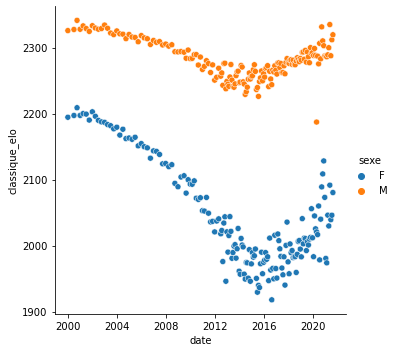

In [21]:
sns.relplot(data=test2.groupby(['date','sexe']).mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="sexe")
plt.show()

Pistes à suivre : faire de même pour les différents titres, gm, master etc

In [22]:
# A compléter

Essayons quel année a été la plus fructueuse aux niveaux des personnes qui ont reçus des titres

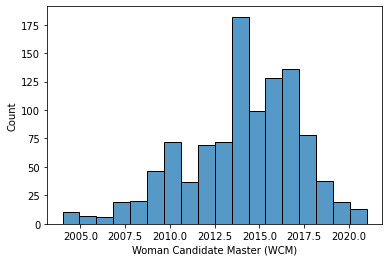

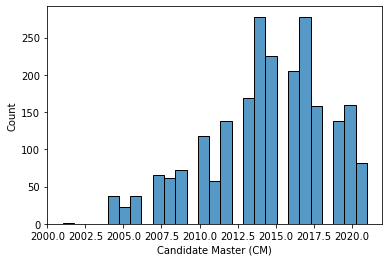

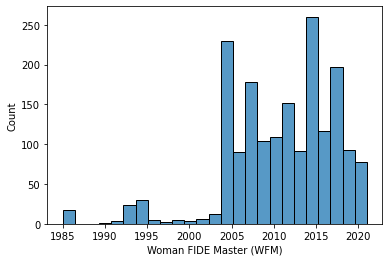

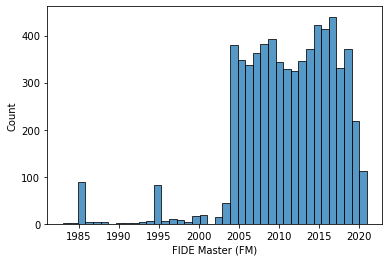

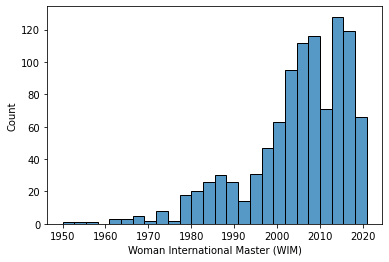

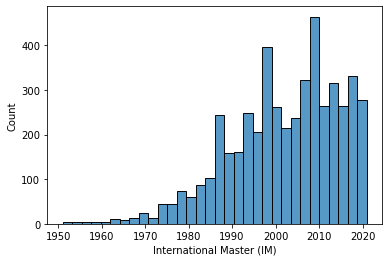

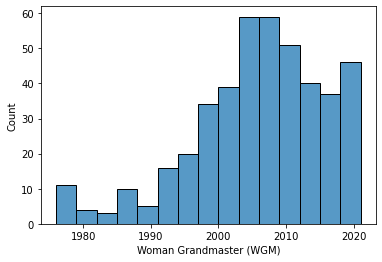

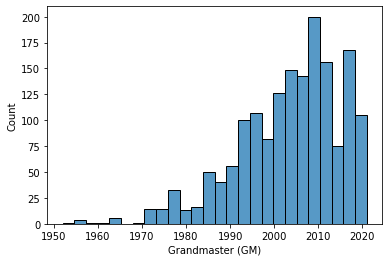

In [23]:
for col in df_players.columns[-8:]:
#     print(col,'\n\n',df_players[col].value_counts(normalize=True).sort_index())
    sns.histplot(data=df_players, x=col)
    plt.show()


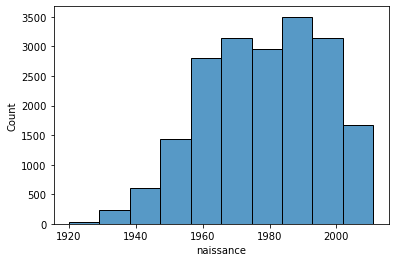

In [24]:
sns.histplot(data = df_players, x='naissance', bins = 10)
plt.show()

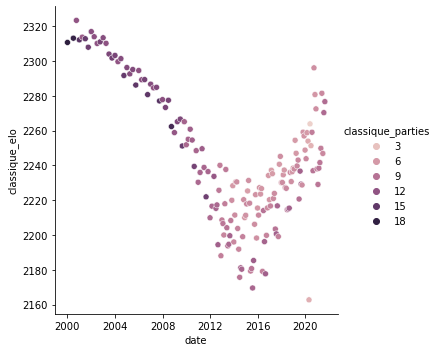

In [25]:
sns.relplot(data=test2.groupby('date').mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="classique_parties")
plt.show()

In [26]:
test2.groupby('date').mean()[['classique_elo', 'classique_parties']]

,classique_elo,classique_parties
date,,
2000-01-01,2310.712878,18.378079
2000-07-01,2313.164940,17.677889
2000-10-01,2323.400381,11.862627
2001-01-01,2312.196743,15.505207
2001-04-01,2313.767399,11.234457
...,...,...
2021-05-01,2249.850467,8.042835
2021-06-01,2281.495286,7.240754
2021-07-01,2246.908115,7.176014


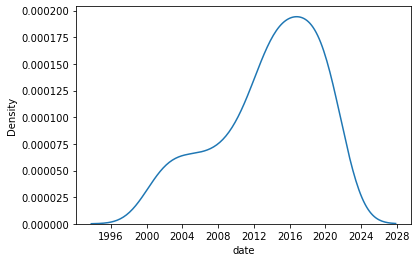

In [27]:
sns.kdeplot(data=test2.groupby('date').mean()[['classique_elo', 'classique_parties']], x="date")
plt.show()

In [28]:
test2.groupby('date').mean()[['classique_elo', 'rapide_elo', 'blitz_elo']]

,classique_elo,rapide_elo,blitz_elo
date,,,
2000-01-01,2310.712878,NaN,NaN
2000-07-01,2313.164940,NaN,NaN
2000-10-01,2323.400381,NaN,NaN
2001-01-01,2312.196743,NaN,NaN
2001-04-01,2313.767399,NaN,NaN
...,...,...,...
2021-05-01,2249.850467,2178.459933,2176.132992
2021-06-01,2281.495286,2221.390661,2213.766929
2021-07-01,2246.908115,2186.437281,2171.507338


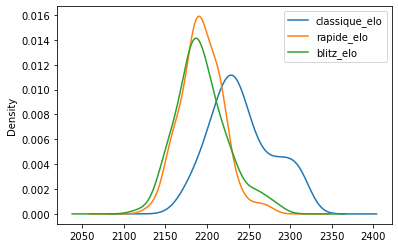

In [29]:
test2.groupby('date').mean()[['classique_elo', 'rapide_elo', 'blitz_elo']].plot.kde()
plt.show()

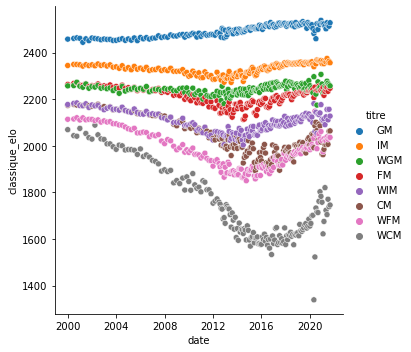

In [30]:
hue_order = ['GM', 'IM', 'WGM', 'FM', 'WIM', 'CM', 'WFM', 'WCM']
sns.relplot(data=test2.groupby(['date','titre']).mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order, kind='scatter')
plt.show()

In [31]:
test2.groupby(['date','titre']).mean()[['classique_elo', 'classique_parties']]

classique_elo  classique_parties
date       titre                                  
2000-01-01 CM       2173.431694          10.333333
           FM       2263.688532          12.652387
           GM       2458.186888          29.562622
           IM       2344.881477          20.802859
           WCM      2069.555556           6.555556
...                         ...                ...
2021-09-01 IM       2356.773050           9.340426
           WCM      1746.040816           9.244898
           WFM      2036.323699          10.167630
           WGM      2257.631579           9.649123
           WIM      2127.831776           9.738318

[1326 rows x 2 columns]

In [32]:
aa = df_rating[df_rating['classique_elo'].notnull()][df_rating[df_rating['classique_elo'].notnull()]['classique_parties'] != 0]

In [33]:
df_rating[df_rating['classique_elo'].notnull()].groupby(['id']).mean()

,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
id,,,,,,
100013,2465.524096,7.957831,2421.700000,1.466667,2390.621622,0.297297
100021,2435.174699,0.277108,NaN,NaN,NaN,NaN
100072,2456.843373,4.493976,2420.500000,4.500000,2398.000000,4.500000
100080,2425.000000,0.000000,NaN,NaN,NaN,NaN
100102,2340.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
61400220,1621.881579,0.934211,NaN,NaN,NaN,NaN
73612251,1526.635135,5.729730,1367.324324,1.932432,1669.146341,1.317073
146242580,2199.857143,0.746032,2178.636364,0.090909,NaN,NaN


In [34]:
df_rating[df_rating['classique_elo'].notnull()].groupby(['id']).mean()['classique_parties'].value_counts(bins=10)

(-0.0256, 2.46]     10874
(2.46, 4.92]         5111
(4.92, 7.381]        2280
(7.381, 9.841]        816
(9.841, 12.301]       250
(12.301, 14.761]       66
(14.761, 17.222]       25
(17.222, 19.682]        7
(19.682, 22.142]        2
(22.142, 24.602]        2
Name: classique_parties, dtype: int64

In [35]:
aa.groupby(['id']).mean()['classique_parties'].value_counts(bins=10)

(6.0, 11.0]     10473
(11.0, 16.0]     4027
(0.949, 6.0]     3496
(16.0, 21.0]      625
(21.0, 26.0]       94
(26.0, 31.0]       20
(31.0, 36.0]        3
(46.0, 51.0]        2
(36.0, 41.0]        1
(41.0, 46.0]        1
Name: classique_parties, dtype: int64

# Progression elo

Essayons de trouver une progression de l'elo suivant le nombre de parties jouées

Certaines jeunes personnes ont une progression d'elo fulgurante, on ne peut pas avoir d'elo représentative pour ces personnes puisqu'ils n'ont pas encore atteint leur apogée.

In [36]:
diff_max_min = df_rating.groupby(['id']).apply(lambda col: col['classique_elo'].max() - col['classique_elo'].min())

In [37]:
diff_max_min.value_counts(bins=5)

(-1.4289999999999998, 285.6]    13984
(285.6, 571.2]                   3629
(571.2, 856.8]                   1442
(856.8, 1142.4]                   343
(1142.4, 1428.0]                   35
dtype: int64

Il faut passer plus de temps pour nettoyer la data

In [46]:
aza = diff_max_min[diff_max_min > 1142]

In [44]:
df_rating[df_rating['id'] == 778346]

,id,date,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
2791149,778346,2021-09-01,2380.0,7.0,1901.0,0.0,2211.0,0.0
2791150,778346,2021-08-01,2386.0,19.0,1901.0,13.0,2211.0,0.0
2791151,778346,2021-07-01,2362.0,0.0,1875.0,7.0,2211.0,0.0
2791152,778346,2021-06-01,2362.0,0.0,1854.0,7.0,2211.0,0.0
2791153,778346,2021-05-01,2362.0,9.0,1816.0,0.0,2211.0,0.0
...,...,...,...,...,...,...,...,...
2791229,778346,2015-01-01,1055.0,0.0,NaN,NaN,NaN,NaN
2791230,778346,2014-12-01,1055.0,0.0,NaN,NaN,NaN,NaN
2791231,778346,2014-11-01,1055.0,0.0,NaN,NaN,NaN,NaN
2791232,778346,2014-10-01,1055.0,0.0,NaN,NaN,NaN,NaN


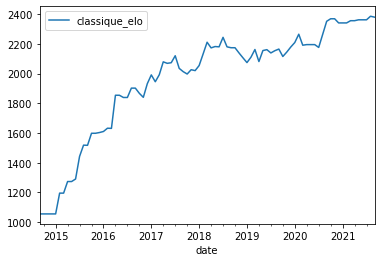

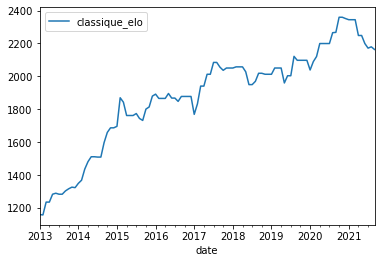

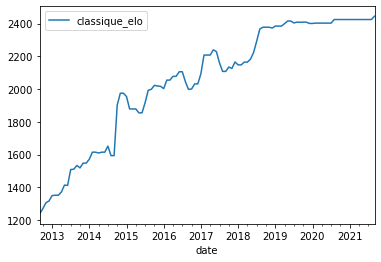

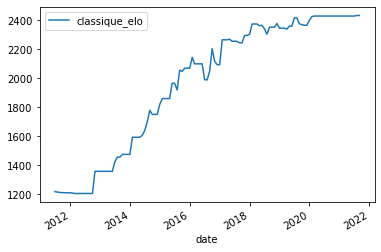

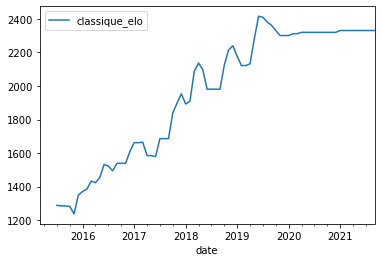

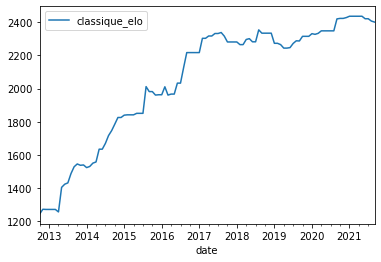

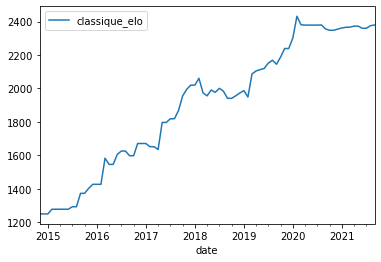

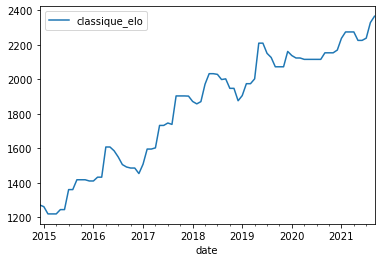

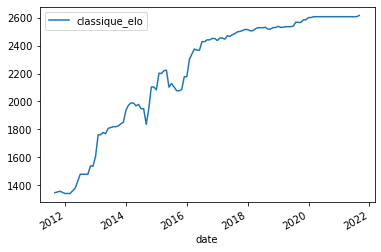

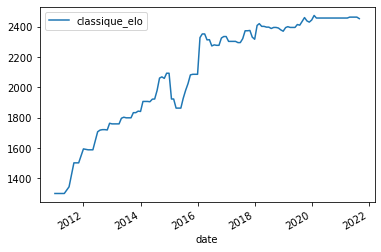

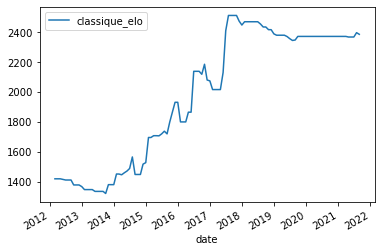

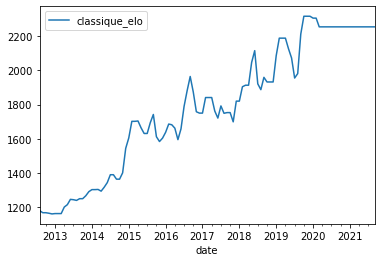

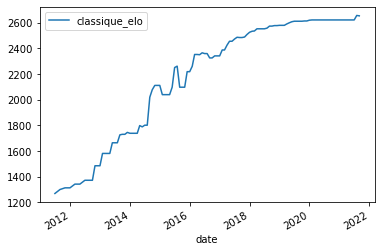

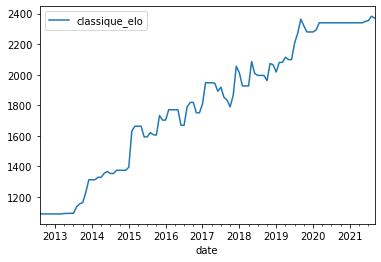

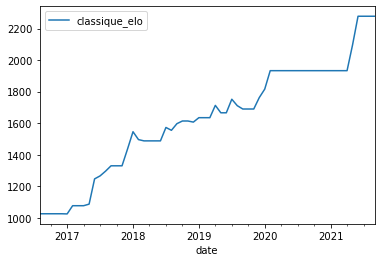

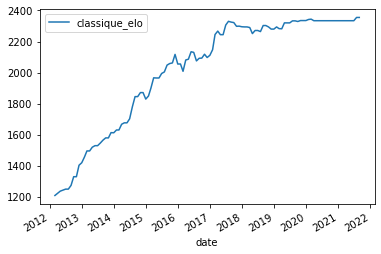

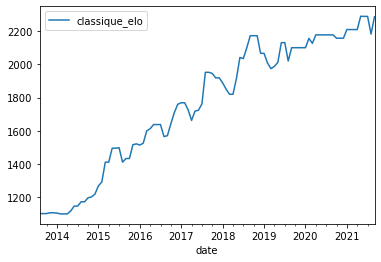

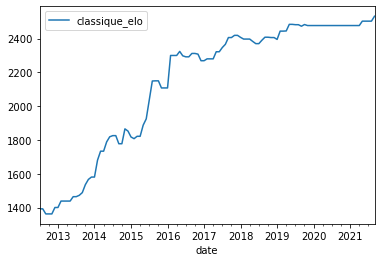

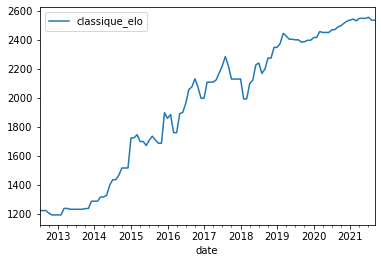

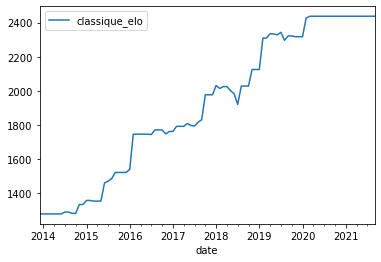

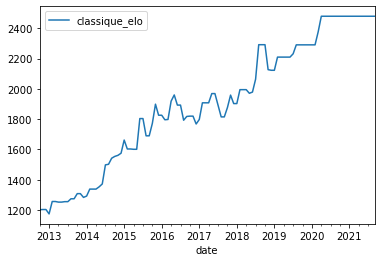

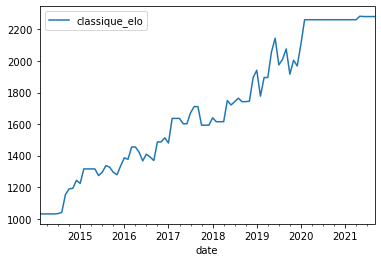

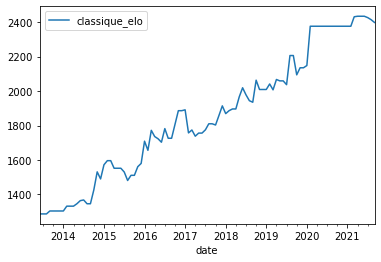

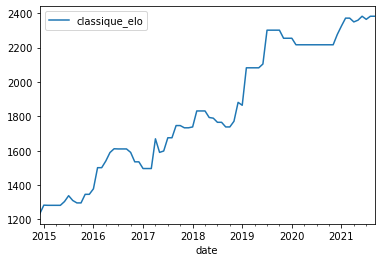

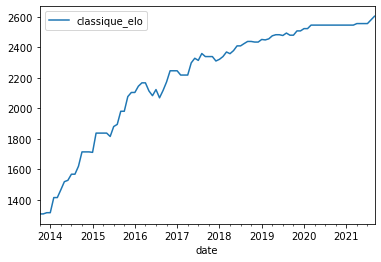

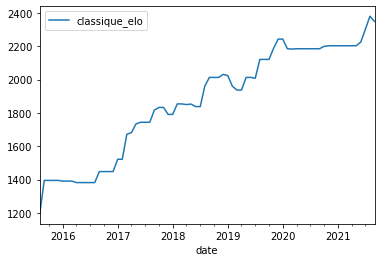

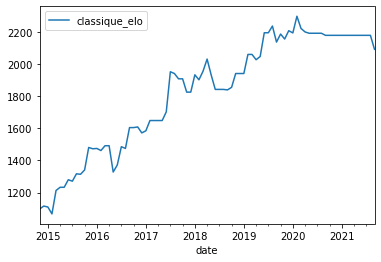

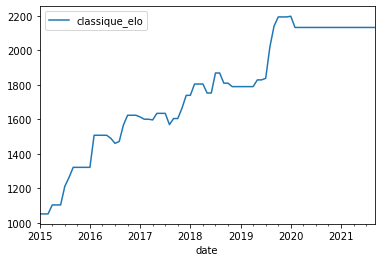

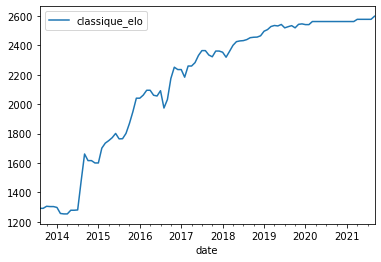

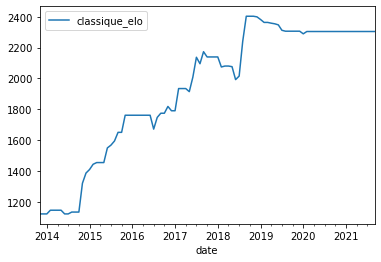

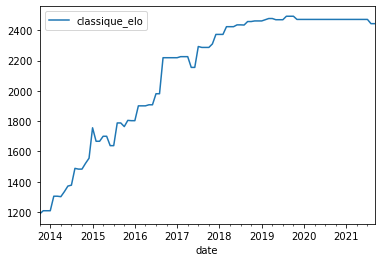

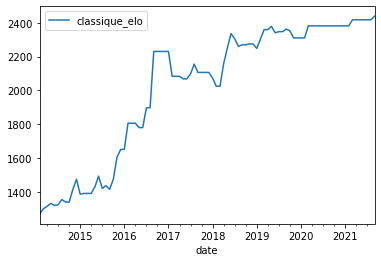

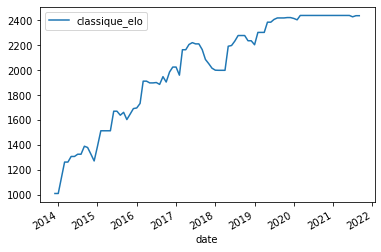

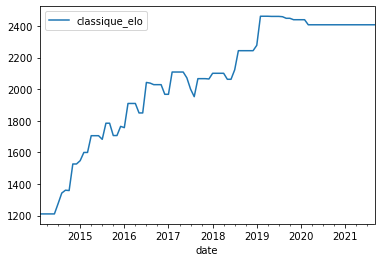

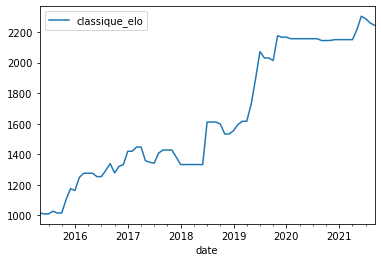

In [65]:
for id_ in aza.index:
    rating_list = df_rating[df_rating['id'] == id_]
    rating_list.plot(x='date',y='classique_elo')
    plt.show()

In [87]:
print(df_rating['date'].value_counts().sort_index().to_string())

2000-01-01     9757
2000-07-01    10035
2000-10-01    10135
2001-01-01    10345
2001-04-01    10455
2001-07-01    10628
2001-10-01    10798
2002-01-01    10954
2002-04-01    11086
2002-07-01    11234
2002-10-01    11416
2003-01-01    11590
2003-04-01    11707
2003-07-01    11903
2003-10-01    12077
2004-01-01    12226
2004-04-01    12345
2004-07-01    12493
2004-10-01    12672
2005-01-01    12804
2005-04-01    12964
2005-07-01    13086
2005-10-01    13262
2006-01-01    13348
2006-04-01    13458
2006-07-01    13572
2006-10-01    13718
2007-01-01    13834
2007-04-01    13959
2007-07-01    14084
2007-10-01    14229
2008-01-01    14356
2008-04-01    14487
2008-07-01    14607
2008-10-01    14781
2009-01-01    14925
2009-04-01    15032
2009-07-01    15162
2009-09-01    15301
2009-11-01    15355
2010-01-01    15454
2010-03-01    15518
2010-05-01    15599
2010-07-01    15687
2010-09-01    15797
2010-11-01    15890
2011-01-01    15987
2011-03-01    16047
2011-05-01    16117
2011-07-01    16212


Pour nous faciliter la tâche pour l'instant nous allons regarder seulement à partir de janvier 2013

In [143]:
df_rating[df_rating['date'] >= '2013-01-01']

,id,date,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
0,4611870,2021-09-01,2290.0,0.0,NaN,NaN,NaN,NaN
1,4611870,2021-08-01,2290.0,0.0,NaN,NaN,NaN,NaN
2,4611870,2021-07-01,2290.0,0.0,NaN,NaN,NaN,NaN
3,4611870,2021-06-01,2290.0,0.0,NaN,NaN,NaN,NaN
4,4611870,2021-05-01,2290.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2835824,13730150,2017-10-01,NaN,NaN,NaN,NaN,1296.0,0.0
2835825,13730150,2017-09-01,NaN,NaN,NaN,NaN,1296.0,0.0
2835826,13730150,2017-08-01,NaN,NaN,NaN,NaN,1296.0,1.0
2835827,13730150,2017-07-01,NaN,NaN,NaN,NaN,1312.0,0.0
